In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../data/petrol_consumption.csv")

In [10]:
df.shape

(48, 5)

In [6]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [13]:
df.columns = [i.lower() for i  in df.columns]

In [14]:
df.head()

,petrol_tax,average_income,paved_highways,population_driver_licence(%),petrol_consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [7]:
df.tail()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
43,7.0,3745,2611,0.508,591
44,6.0,5215,2302,0.672,782
45,9.0,4476,3942,0.571,510
46,7.0,4296,4083,0.623,610
47,7.0,5002,9794,0.593,524


In [8]:
# EDA - Exploratory Data Analysis

In [15]:
df.describe()

,petrol_tax,average_income,paved_highways,population_driver_licence(%),petrol_consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AA772EFFD0>,
      dtype=object)

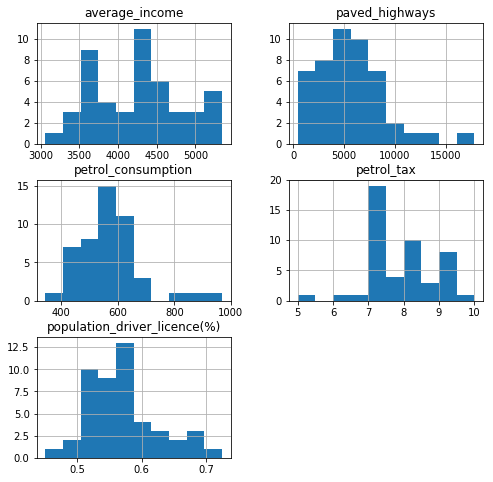

In [19]:
df.hist(figsize=(8, 8))

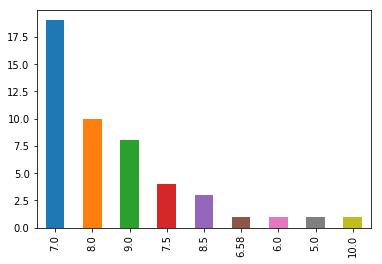

In [40]:
df.petrol_tax.value_counts().plot.bar()

In [20]:
import seaborn as sns

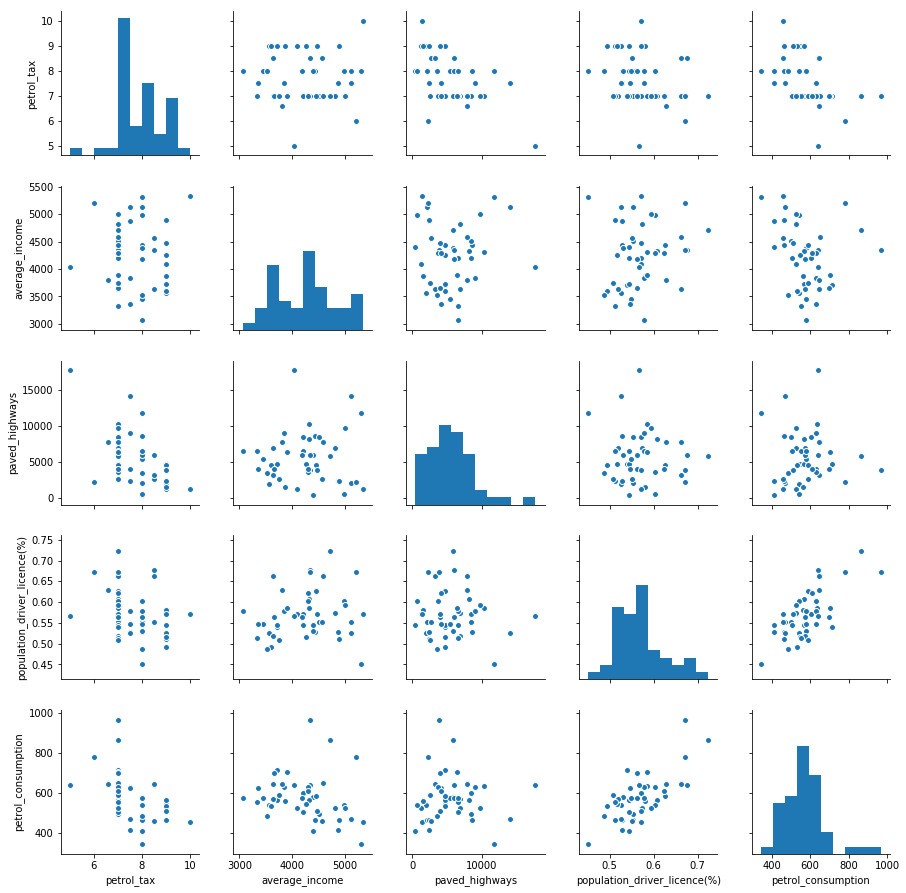

In [21]:
sns.pairplot(df)

In [22]:
df.corr()

,petrol_tax,average_income,paved_highways,population_driver_licence(%),petrol_consumption
petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
paved_highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
population_driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
petrol_consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


In [26]:
# -1 ..............0............... +1 # Correlation Line
# -1 - Inversely Proposational
# 0  - No relationship
# +1 - Almost Identical

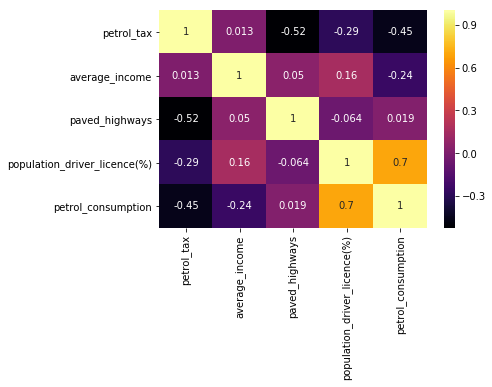

In [32]:
sns.heatmap(df.corr(), annot=True, cmap="inferno")

(array([1, 2, 3, 4, 5]), <a list of 5 Text xticklabel objects>)

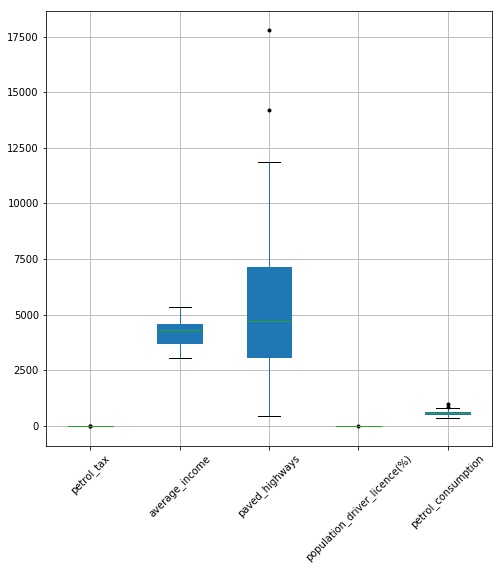

In [44]:
df.boxplot(patch_artist=True, sym=".k", figsize=(8,8))
plt.xticks(rotation=45)

In [45]:
df.columns

Index(['petrol_tax', 'average_income', 'paved_highways',
       'population_driver_licence(%)', 'petrol_consumption'],
      dtype='object')

In [47]:
df.groupby("petrol_tax").count()

,average_income,paved_highways,population_driver_licence(%),petrol_consumption
petrol_tax,,,,
5.00,1,1,1,1
6.00,1,1,1,1
6.58,1,1,1,1
7.00,19,19,19,19
7.50,4,4,4,4
8.00,10,10,10,10
8.50,3,3,3,3
9.00,8,8,8,8
10.00,1,1,1,1


In [51]:
df.groupby("petrol_tax").sum()

,average_income,paved_highways,population_driver_licence(%),petrol_consumption
petrol_tax,,,,
5.00,4045,17782,0.566,640
6.00,5215,2302,0.672,782
6.58,3802,7834,0.629,644
7.00,80082,120034,11.169,12003
7.50,17199,29719,2.180,2144
8.00,42892,50948,5.385,5020
8.50,12550,11903,1.891,1748
9.00,32481,25285,4.313,4247
10.00,5342,1333,0.571,457


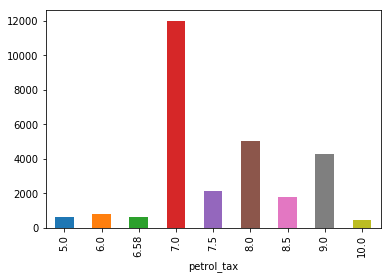

In [50]:
df.groupby("petrol_tax").sum()["petrol_consumption"].plot.bar()

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
reg = RandomForestRegressor(n_estimators=200)

In [76]:
reg.fit(df.iloc[:, 0:4], df.iloc[:, 4])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [77]:
Y_pred = reg.predict(df.iloc[:,0:4])

In [78]:
from sklearn import metrics

In [79]:
metrics.mean_absolute_error(df.iloc[:, 4], Y_pred)

16.9934375

In [80]:
metrics.mean_squared_error(df.iloc[:, 4], Y_pred)

725.4789151041665

In [81]:
np.sqrt(metrics.mean_squared_error(df.iloc[:, 4], Y_pred))

26.934715797724067